# 04 - Option Pricing
Price European options using Black--Scholes and Monte Carlo GBM, with a quick convergence check.

In [1]:
import sys
from pathlib import Path

# Ensure repository root is on the path when running from notebooks/
ROOT = Path.cwd()
if not (ROOT / 'src').exists():
    ROOT = ROOT.parent
if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))
print(f"Using project root: {ROOT}")

Using project root: /Users/mahdihoumani/Documents/Quant/VolatilityModellingAndOptionPricing/volatility-options-quant


In [2]:
import matplotlib.pyplot as plt

from src.options.black_scholes import price_option
from src.options.monte_carlo import price_european_option_mc, price_european_option_mc_ci

SPOT = 430.0
STRIKE = 430.0
RATE = 0.04  # annualized risk-free rate
VOL = 0.20   # annualized volatility (e.g., from forecasts)
MATURITY = 0.5  # in years
OPTION_TYPE = 'call'

bs = price_option(SPOT, STRIKE, RATE, VOL, MATURITY, option_type=OPTION_TYPE)
bs.price, bs.d1, bs.d2


(np.float64(28.496435458543317), 0.21213203435596423, 0.0707106781186547)

In [3]:
mc = price_european_option_mc_ci(
    spot=SPOT,
    strike=STRIKE,
    rate=RATE,
    vol=VOL,
    maturity=MATURITY,
    option_type=OPTION_TYPE,
    steps=252,
    n_paths=40_000,
    rng_seed=123,
)
mc


{'price': 28.50899987229004,
 'stderr': 0.20666612807216833,
 'ci_low': 28.10393426126859,
 'ci_high': 28.91406548331149}

Convergence plot below shows Monte Carlo price with 95% confidence intervals; intervals shrink as path count grows and should bracket the Black--Scholes reference.

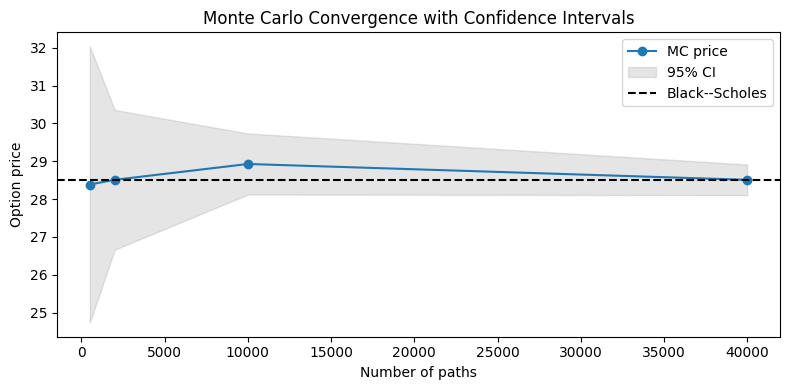

In [4]:
# Convergence of Monte Carlo price vs number of paths with 95% CI
path_grid = (500, 2_000, 10_000, 40_000)
prices = []
stderr = []
ci_low = []
ci_high = []
for n in path_grid:
    res = price_european_option_mc_ci(
        spot=SPOT,
        strike=STRIKE,
        rate=RATE,
        vol=VOL,
        maturity=MATURITY,
        option_type=OPTION_TYPE,
        steps=252,
        n_paths=n,
        rng_seed=123,
    )
    prices.append(res['price'])
    stderr.append(res['stderr'])
    ci_low.append(res['ci_low'])
    ci_high.append(res['ci_high'])

plt.figure(figsize=(8, 4))
plt.plot(path_grid, prices, marker='o', label='MC price')
plt.fill_between(path_grid, ci_low, ci_high, color='gray', alpha=0.2, label='95% CI')
plt.axhline(bs.price, color='k', linestyle='--', label='Black--Scholes')
plt.xlabel('Number of paths')
plt.ylabel('Option price')
plt.title('Monte Carlo Convergence with Confidence Intervals')
plt.legend()
plt.tight_layout()
plt.show()
